# Delay Alignment and Gain Balancing
### with TCPi Channel and ESP32 as Server

In [5]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Softwares\Python\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['interactive', 'plot', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from pathfinder import Pathfinder

# abs_paths = [' ']
# Pathfinder.relative_paths_from_abs(abs_paths)
 
relative_paths = [['..', '..', '..', '..', 'SigmaDSP', 'bitbucket', 'github', 'codes'],
                  ['..', '..', '..', '..', 'Signal Generators', 'bitbucket', 'github', 'codes'],
                  ['..', '..', '..', '..', 'Utilities', 'bitbucket', 'github', 'codes'], 
                  ['..', '..', '..', '..', 'TCPi', 'bitbucket', 'github', 'codes']] 

Pathfinder.append_relative_paths(relative_paths)
# =====================================================

import pandas as pd

#https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
# =====================================================

## TCPi

import time 

from tcpi.protocols.TCPIP1701 import class_finder
# =====================================================

### Client

from tcpi.bus.tcpi_client import I2C as TcpI2C_client

tcpi_client = TcpI2C_client(class_finder)
server_ip = '192.168.76.36'
tcpi_client.connect(server_ip = server_ip, server_port = 8086)
time.sleep(1)
# =====================================================

## DSP processor

from sigma.sigma_dsp.adau import ADAU1401

# dsp = ADAU1401(bus = bus)
dsp = ADAU1401(bus = tcpi_client)
# =====================================================

def reset_dsp():
    CMD_RESET_DSP = b'Reset_DSP'
    tcpi_client.send(CMD_RESET_DSP)
    time.sleep(0.5)    

reset_dsp()


[Connecting server: ('192.168.76.36', 8086)]

[Connected with server: ('192.168.76.36', 8086)]


### Reset if needed

In [3]:
# CMD_RESET = b'Reset'

# tcpi_client.send(CMD_RESET)

In [4]:
# tcpi_client.connect(server_ip = server_ip, server_port = 8086)

In [5]:
# tcpi_client.set_server_property('name', 'Stereo Speakers')

In [6]:
# tcpi_client.get_server_property('name')

In [7]:
# servers = {}
# servers[tcpi_client.get_server_property('name')] = tcpi_client.socket.getpeername()
# servers

## SigmaStudio project file

In [8]:
import os

SigmaStudio_project_file_url = os.sep.join(['..', 'SigmaStudio projects', 'projects', 'demo', 'demo.dspproj'])
SigmaStudio_project_file_url

'..\\SigmaStudio projects\\projects\\demo\\demo.dspproj'

![](https://github.com/Wei1234c/DRC/blob/master/SigmaStudio%20projects/projects/demo/demo.png?raw=true)

## Factory

In [9]:
import os
from sigma.factory import Factory 

project_xml_file_url = os.sep.join(['..', 'SigmaStudio projects', 'projects', 'demo', 'demo.xml'])
class_files_root_url = os.sep.join(['..', '..', '..', '..', 'SigmaDSP', 'bitbucket', 'github', 'codes', 'sigma', 'sigma_studio', 'toolbox', 'cells']) 

factory = Factory(project_xml_file_url = project_xml_file_url,
                  class_files_root_url = class_files_root_url,
                  dsp = dsp
                 )

## IC

In [10]:
# showing cells, algorithms, parameters of this project

ic = factory.get_ic()
ic.df

param_full_name  \
algorithm_name              cell_name     param_name                                                       
EQ1940Invert                Invert0       gain                                         EQ1940Invert1gain   
                            Invert1       gain                                         EQ1940Invert2gain   
FIRFiltAlg                  FIR0          fircoeff_0                               FIRFiltAlg1fircoeff_0   
                            FIR1          fircoeff_0                               FIRFiltAlg2fircoeff_0   
Gain1940AlgNS               Gain0                                                         Gain1940AlgNS2   
                            Gain1                                                         Gain1940AlgNS1   
MultCtrlFracDelGrowFixedAlg Delay0                                          MultCtrlFracDelGrowFixedAlg1   
                                          Limit1buffersize  MultCtrlFracDelGrowFixedAlg1Limit1buffersize   
                            Delay1                                          MultCtrlFracDelGrowFixedAlg2   
                                          Limit1buffersize  MultCtrlFracDelGrowFixedAlg2Limit1buffersize   
MuteNoSlewAlg               Mute00        mute                                        MuteNoSlewAlg1mute   
                            Mute01        mute                                        MuteNoSlewAlg2mute   
                            Mute10        mute                                        MuteNoSlewAlg3mute   
                            Mute11        mute                                        MuteNoSlewAlg4mute   
PEQ1Chan                    Param EQ0     0B1                                               PEQ1Chan20B1   
                                          0B10                                             PEQ1Chan20B10   
                                          0B2                                               PEQ1Chan20B2   
                                          0B3                                               PEQ1Chan20B3   
                                          0B4                                               PEQ1Chan20B4   
                                          0B5                                               PEQ1Chan20B5   
                                          0B6                                               PEQ1Chan20B6   
                                          0B7                                               PEQ1Chan20B7   
                                          0B8                                               PEQ1Chan20B8   
                                          0B9                                               PEQ1Chan20B9   
                                          1A1                                               PEQ1Chan21A1   
                                          1A10                                             PEQ1Chan21A10   
                                          1A2                                               PEQ1Chan21A2   
                                          1A3                                               PEQ1Chan21A3   
                                          1A4                                               PEQ1Chan21A4   
                                          1A5                                               PEQ1Chan21A5   
                                          1A6                                               PEQ1Chan21A6   
                                          1A7                                               PEQ1Chan21A7   
                                          1A8                                               PEQ1Chan21A8   
                                          1A9                                               PEQ1Chan21A9   
                                          1B1                                               PEQ1Chan21B1   
                                          1B10                                             PE

## Cells 

In [11]:
cells = factory.get_cells(ic)

### Get Cell objects ready for use.

In [12]:
# # un-comment this to generate a script to embody Cell objects.

# for o in factory.get_cells_manifest():
#     print(o) 

In [13]:
# assign variable names to each Cell for easy access.

delay0 = cells['Delay0']  # Fractional Delay( 1 )
delay1 = cells['Delay1']  # Fractional Delay( 1 )
fir0 = cells['FIR0']  # FIR( 1 )
fir1 = cells['FIR1']  # FIR( 1 )
gain0 = cells['Gain0']  # Gain (no slew)( 1 )
gain1 = cells['Gain1']  # Gain (no slew)( 1 )
invert0 = cells['Invert0']  # Invert( 1 )
invert1 = cells['Invert1']  # Invert( 1 )
merger0 = cells['Merger0']  # Signal MixerC
merger1 = cells['Merger1']  # Signal MixerC
mute00 = cells['Mute00']  # No Slew (Standard)( 1 )
mute01 = cells['Mute01']  # No Slew (Standard)( 1 )
mute10 = cells['Mute10']  # No Slew (Standard)( 1 )
mute11 = cells['Mute11']  # No Slew (Standard)( 1 )
param_eq0 = cells['Param EQ0']  # PEQ1Chan - Double Precision( 1 )
param_eq1 = cells['Param EQ1']  # PEQ1Chan - Double Precision( 1 )
pink_flt1 = cells['Pink Flt1']  # Pink Noise Filter( 1 )
source_switch = cells['Source_Switch']  # Stereo SW Slew( 3 )
sw_noise = cells['SW_noise']  # Mono SW Slew( 2 )
tone = cells['Tone']  # Tone Synthesis (lookup/sine)( 1 )
white_noise = cells['White_Noise']  # White Noise( 1 )

In [14]:
channels = {'left' : {'idx_channel': 0,
                      'muter': mute00,
                      'gain' : gain0,
                      'delay': delay0,
                      'peq'  : param_eq0,
                      'fir'  : fir0},
            'right': {'idx_channel': 1,
                      'muter': mute11,
                      'gain' : gain1,
                      'delay': delay1,
                      'peq'  : param_eq1,
                      'fir'  : fir1}}

def mute_all(value = True):
    for channel in channels.values():
        channel['muter'].mute(value)
        
def source_select_white_noise():
    source_switch.switch(1)
    invert1.enable(False)
    sw_noise.switch(1)
    
def source_select_white_noise_inverted():
    source_switch.switch(1)
    invert1.enable(True)
    sw_noise.switch(1)
    
def source_select_normal():
    source_switch.switch(2)
    mute_all(False)

def measure_channel(channel_name):
    mute_all(True)
    source_select_white_noise()
    channels[channel_name]['muter'].mute(False)
    
def set_peq_coeffs(channel_name, coeffs):   
    muter = channels[channel_name]['muter'] 
    muter.mute(True)
    channels[channel_name]['peq'].set_coefficients_values(coeffs)
    muter.mute(False)    

def reset_peq_coeffs(channel_name):   
    muter = channels[channel_name]['muter'] 
    muter.mute(True)
    channels[channel_name]['peq'].reset_coefficients()
    muter.mute(False)
    
def reset_delays():
    delay0.set_delayed_percentage(0)
    delay1.set_delayed_percentage(0)
    
def reset_gains():
    gain0.set_gain(1)
    gain1.set_gain(1)

# How

In [1]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

from math import pi
import thinkdsp
from drc.tuners.delay.aligner import DelayAligner
from drc.tuners.gain.balancer import GainBalancer

In [2]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

### How do we align delay between two sound waves ?
- Invert one channel.
- adjust the delay of one channel until the combined power is minimal.
- Then adjust the gain of one channel until the combined power is minimal.

In [25]:
def plot(delay_0 = -0.9, gain_0 = 1.0, invert = False): 
    
    fig, axs = plt.subplots(figsize = (10, 6), nrows = 2, ncols = 1)
    
    
    sig_0 = thinkdsp.SinSignal(amp = gain_0 * (-1 if invert else 1), offset = -delay_0)
    sig_1 = thinkdsp.SinSignal(amp = 0.6, offset = -0.3)
    sig_sum = sig_0 + sig_1

    duration = sig_0.period * 3
    
    plt.sca(axs[0])
    axs[0].set_ylim((-2, 2))
    sig_0.make_wave(duration = duration).plot(color = 'red')
    sig_1.make_wave(duration = duration).plot(color = 'green')
    
    plt.sca(axs[1])
    axs[1].set_ylim((-2, 2))
    sig_sum.make_wave(duration = duration).plot(color = 'blue')

In [27]:
interact(plot,
         delay_0 = (-3, 3, 0.1),
         gain_0 = (0, 1, 0.1));

interactive(children=(FloatSlider(value=-0.9, description='delay_0', max=3.0, min=-3.0), FloatSlider(value=1.0…

# Delay Alignment

In [19]:
# from pprint import pprint

# pprint(Sound.scan_devices(0))

## Setup Source Signal

In [20]:
source_select_normal()
source_select_white_noise_inverted()

## Optimizing fractional delay
### The speaker closest to microphone does the delay

In [21]:
fractional_delay = delay0
estimated_distance_difference_cm = 6.0

optimized_delay_ms: 0.16433566433566432
distance_difference_cm:5.639999999999999


0.16433537006378177

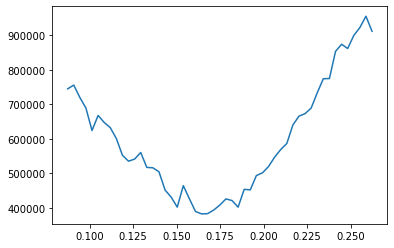

In [22]:
reset_gains()
reset_delays()
time.sleep(1)

ms_delays, powers, optimized_delay_ms, distance_difference_cm = \
    DelayAligner.optimize(fractional_delay = fractional_delay, 
                          estimated_distance_difference_cm = estimated_distance_difference_cm, 
                          input_device_idx = 1,
                          probe_range = (0.5, 1.5), bins = 51, 
                          wait_between_ms = 100)
    
plt.plot(ms_delays, powers);

print(f'optimized_delay_ms: {optimized_delay_ms}\ndistance_difference_cm:{distance_difference_cm}')
delay0.get_delayed_ms()

# Gain Balancing

In [23]:
gain_cell = gain0
gain_cell_base = gain1

optimized_gain: 0.6779999999999999


0.6779999732971191

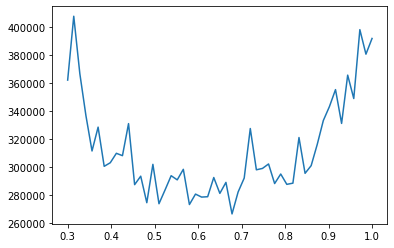

In [24]:
reset_gains()
time.sleep(1)

gains, powers, optimized_gain = \
    GainBalancer.optimize(gain_cell, input_device_idx = 1,
                          gain_range = (0.3, 1), bins = 51,
                          wait_between_ms = 100)
plt.plot(gains, powers);

print(f'optimized_gain: {optimized_gain}')
gain0.get_gain()

### Or we can directly measure the SPL difference between channels and set the gain (preferred method).

In [25]:
reset_gains()
time.sleep(1)

MEAN_SPL_FREQ_LIMITS = (200, 6000)

spl_target, spl, optimized_gain_dB, spl_balanced = \
    GainBalancer.balance(gain_cell, gain_cell_base, 
                         input_device_idx = 1, freq_lims = MEAN_SPL_FREQ_LIMITS)

print('spl_target', spl_target)
print('spl', spl)
print('optimized_gain_dB', optimized_gain_dB) 
print('optimized_gain', gain0.get_gain()) 
print('spl_balanced', spl_balanced)

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


spl_target 44.53776003374746
spl 46.92209025648614
optimized_gain_dB -2.384330222738683
optimized_gain 0.7599472999572754
spl_balanced 44.60036017357191


# Combined
### Must align delay before gain-balancing.

In [26]:
reset_gains()
reset_delays()
time.sleep(1)

DelayAligner.optimize(fractional_delay = fractional_delay, 
                      estimated_distance_difference_cm = estimated_distance_difference_cm,
                      input_device_idx = 1)

# GainBalancer.optimize(gain_cell = gain0, input_device_idx = 1);
GainBalancer.balance(gain_cell = gain0, gain_cell_base = gain1, input_device_idx = 1, freq_lims = MEAN_SPL_FREQ_LIMITS)

print(f'optimized_delay_ms: {delay0.get_delayed_ms()}\noptimized_gain:{gain0.get_gain()}')

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


optimized_delay_ms: 0.16433537006378177
optimized_gain:0.732172966003418


In [27]:
source_select_normal()

# Close TCP channels

In [28]:
# tcpi_client.stop()